In [4]:
import pandas as pd
import numpy as np

x = pd.DataFrame(
    np.array([
        5, 7, 8,
        np.nan, np.nan, np.nan,
        -5, 0, 25,
        999, 1, -1,
        np.nan, 0, np.nan,
        -1, 0, 2,
        5, 4, 1,
        -1, 1, 0,
        6, 3, 2,
        np.nan, -2, np.nan
    ])\
    .reshape((10, 3))
)

x.columns = ['f1', 'f2', 'f3']
print(x)

      f1   f2    f3
0    5.0  7.0   8.0
1    NaN  NaN   NaN
2   -5.0  0.0  25.0
3  999.0  1.0  -1.0
4    NaN  0.0   NaN
5   -1.0  0.0   2.0
6    5.0  4.0   1.0
7   -1.0  1.0   0.0
8    6.0  3.0   2.0
9    NaN -2.0   NaN


In [5]:
x.shape

(10, 3)

In [6]:
x.dropna(axis = 0, thresh = 1, inplace = True)
x.reset_index(inplace = True)
x.drop(['index'], axis = 1, inplace = True)
print(x)

      f1   f2    f3
0    5.0  7.0   8.0
1   -5.0  0.0  25.0
2  999.0  1.0  -1.0
3    NaN  0.0   NaN
4   -1.0  0.0   2.0
5    5.0  4.0   1.0
6   -1.0  1.0   0.0
7    6.0  3.0   2.0
8    NaN -2.0   NaN


In [7]:
x.shape

(9, 3)

In [8]:
from sklearn.impute import MissingIndicator

x.replace({999 : np.nan}, inplace = True)
indicator = MissingIndicator(missing_values = np.nan)
indicator = indicator.fit_transform(x)
indicator = pd.DataFrame(indicator, columns = ['f1', 'f3'])
print(indicator)

      f1     f3
0  False  False
1  False  False
2   True  False
3   True   True
4  False  False
5  False  False
6  False  False
7  False  False
8   True   True


In [9]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit_transform(x)

array([[ 5.        ,  7.        ,  8.        ],
       [-5.        ,  0.        , 25.        ],
       [ 1.5       ,  1.        , -1.        ],
       [ 1.5       ,  0.        ,  5.28571429],
       [-1.        ,  0.        ,  2.        ],
       [ 5.        ,  4.        ,  1.        ],
       [-1.        ,  1.        ,  0.        ],
       [ 6.        ,  3.        ,  2.        ],
       [ 1.5       , -2.        ,  5.28571429]])

In [10]:
x.fillna(x.mean(), inplace = True)
x

,f1,f2,f3
0,5.0,7.0,8.000000
1,-5.0,0.0,25.000000
2,1.5,1.0,-1.000000
3,1.5,0.0,5.285714
4,-1.0,0.0,2.000000
5,5.0,4.0,1.000000
6,-1.0,1.0,0.000000
7,6.0,3.0,2.000000
8,1.5,-2.0,5.285714


Display the original values of the dataset 

    f1   f2         f3
0  5.0  7.0   8.000000
1 -5.0  0.0  25.000000
2  1.5  1.0  -1.000000
3  1.5  0.0   5.285714
4 -1.0  0.0   2.000000


array([[<Axes: title={'center': 'f1'}>, <Axes: title={'center': 'f2'}>],
       [<Axes: title={'center': 'f3'}>, <Axes: >]], dtype=object)

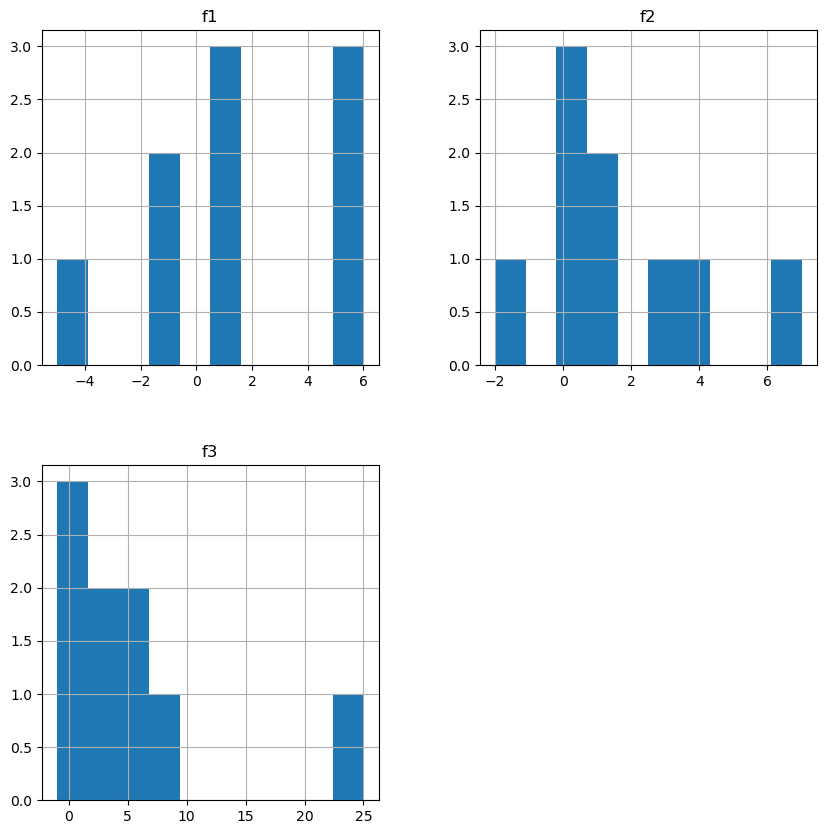

In [11]:
print('Display the original values of the dataset \n')
df_array = pd.DataFrame(x)
print(df_array.head())
pd.DataFrame.hist(df_array, figsize = [10, 10])

In [12]:
df_array.to_csv('DataSet1Sample.csv', index = False)

Normalize dataset: 

Original values of the dataset: 

    f1   f2         f3
0  5.0  7.0   8.000000
1 -5.0  0.0  25.000000
2  1.5  1.0  -1.000000
3  1.5  0.0   5.285714
4 -1.0  0.0   2.000000

Normalize values of the dataset: 

          0         1         2
0  0.909091  1.000000  0.346154
1  0.000000  0.222222  1.000000
2  0.590909  0.333333  0.000000
3  0.590909  0.222222  0.241758
4  0.363636  0.222222  0.115385


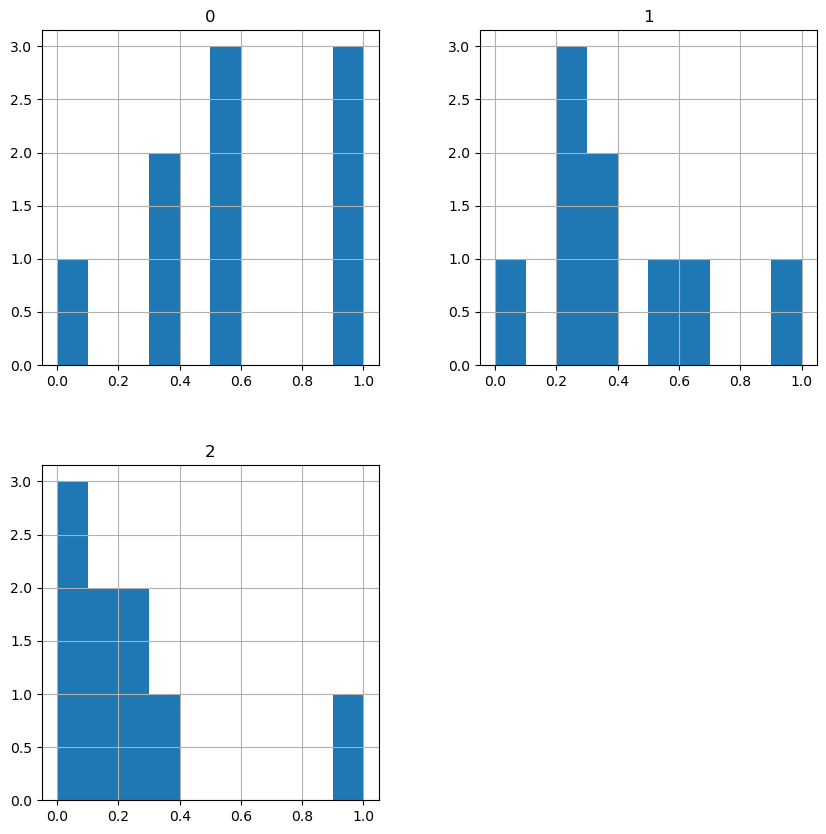

In [15]:
from sklearn.preprocessing import MinMaxScaler

print('Normalize dataset: \n')
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledSet = scaler.fit_transform(df_array)
rescaledSet = pd.DataFrame(rescaledSet)
pd.DataFrame.hist(rescaledSet, figsize = [10, 10])

print('Original values of the dataset: \n')
print(df_array.head())
print('\nNormalize values of the dataset: \n')
print(rescaledSet.head())

Rescaling dataset: 

Original values of the dataset: 

    f1   f2         f3
0  5.0  7.0   8.000000
1 -5.0  0.0  25.000000
2  1.5  1.0  -1.000000
3  1.5  0.0   5.285714
4 -1.0  0.0   2.000000

Normalize values of the dataset: 

          0         1         2
0  1.052635  2.140575  0.362917
1 -1.954893 -0.611593  2.635927
2  0.000000 -0.218426 -0.840440
3  0.000000 -0.611593  0.000000
4 -0.751882 -0.611593 -0.439321


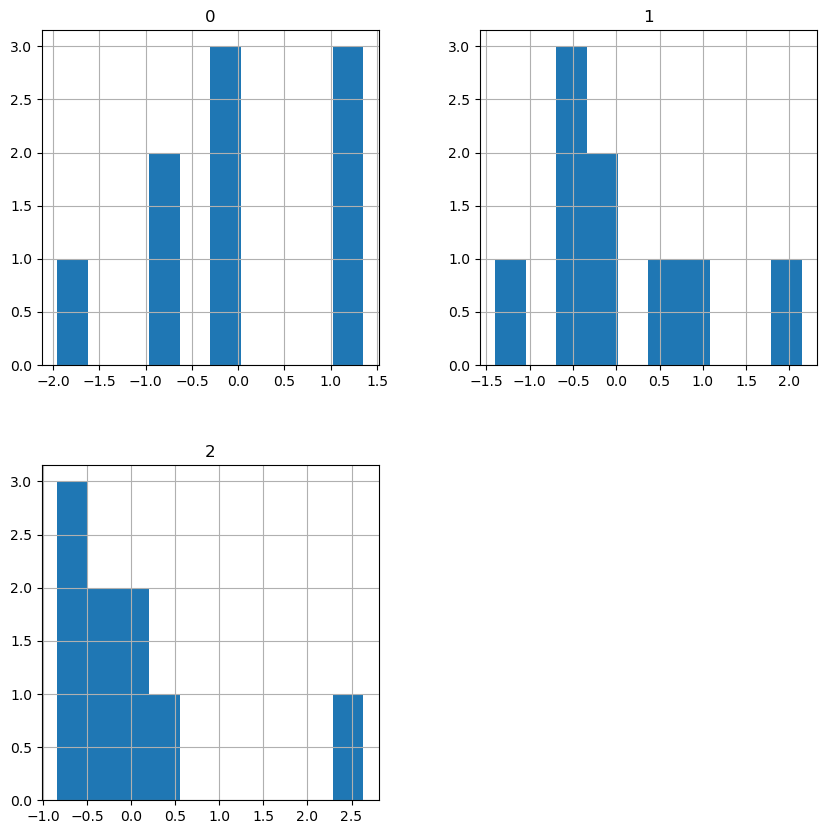

In [18]:
from sklearn.preprocessing import scale

print('Rescaling dataset: \n')
scaledSet = scale(df_array)
scaledSet = pd.DataFrame(scaledSet)
pd.DataFrame.hist(scaledSet, figsize = [10, 10])

print('Original values of the dataset: \n')
print(df_array.head())
print('\nNormalize values of the dataset: \n')
print(scaledSet.head())

Binarized dataset: 

Original values of the dataset: 

    f1   f2         f3
0  5.0  7.0   8.000000
1 -5.0  0.0  25.000000
2  1.5  1.0  -1.000000
3  1.5  0.0   5.285714
4 -1.0  0.0   2.000000

Normalize values of the dataset: 

     0    1    2
0  1.0  1.0  1.0
1  0.0  0.0  1.0
2  1.0  1.0  0.0
3  1.0  0.0  1.0
4  0.0  0.0  1.0


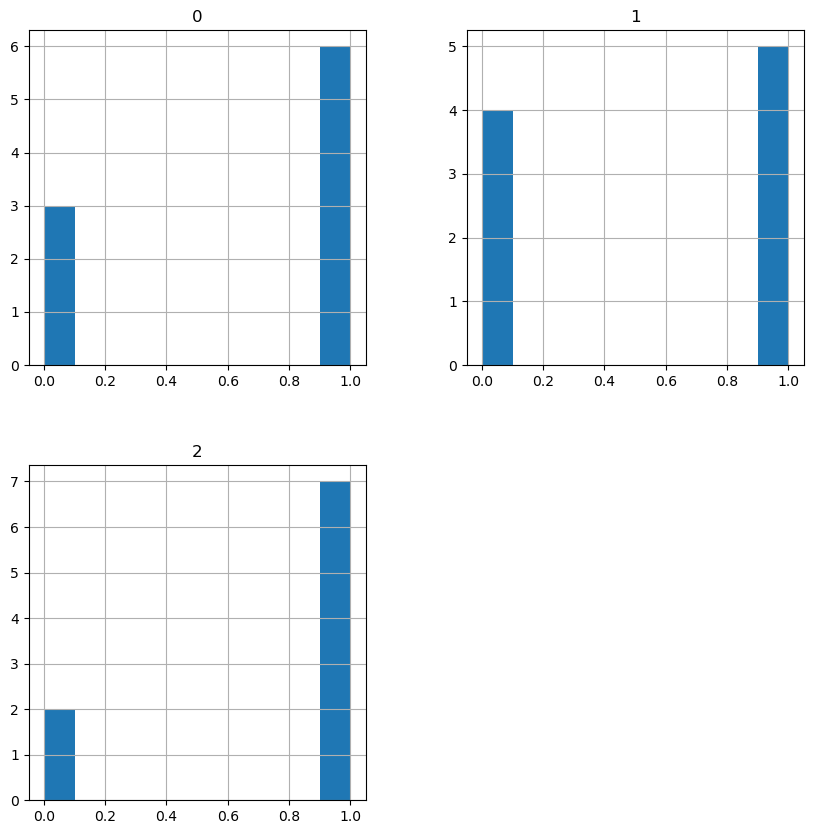

In [26]:
from sklearn.preprocessing import Binarizer

print('Binarized dataset: \n')
binarizer = Binarizer(threshold = 0.5, copy = True)
binarizedSet = binarizer.fit_transform(df_array)
binarizedSet = pd.DataFrame(binarizedSet)
pd.DataFrame.hist(binarizedSet, figsize = [10, 10])

print('Original values of the dataset: \n')
print(df_array.head())
print('\nNormalize values of the dataset: \n')
print(binarizedSet.head())

In [21]:
rescaledSet.to_csv('rescaled_data.csv', index = False)

In [22]:
scaledSet.to_csv('scaled_data.csv', index = False)

In [23]:
binarizedSet.to_csv('binarized_data.csv', index = False)

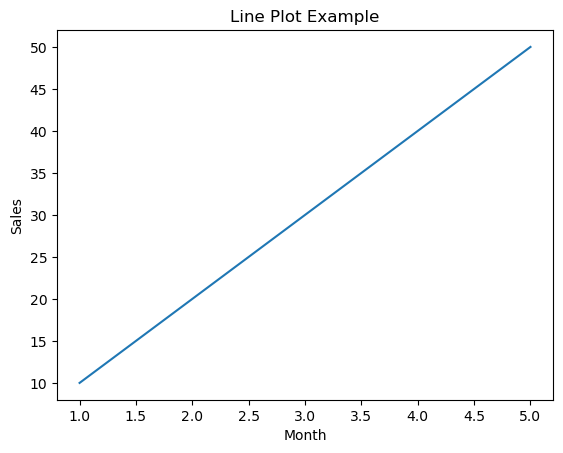

In [28]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [10, 20, 30, 40, 50]

plt.plot(x, y)
plt.title('Line Plot Example')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

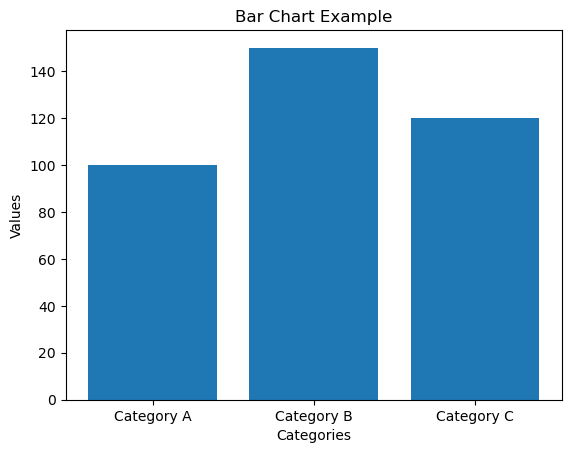

In [29]:
categories = ['Category A', 'Category B', 'Category C']
values = [100, 150, 120]

plt.bar(categories, values)
plt.title('Bar Chart Example')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

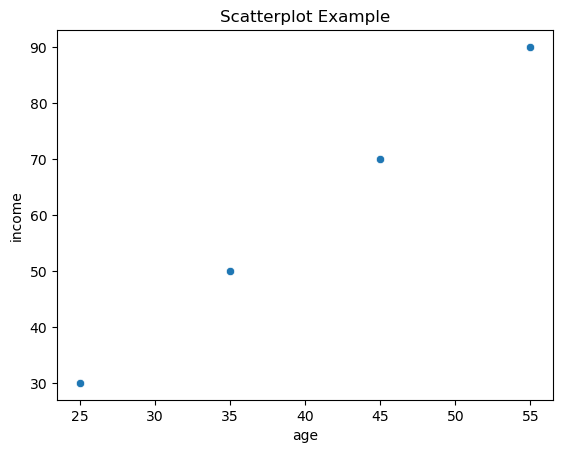

In [30]:
import seaborn as sns

df = pd.DataFrame({
    'age': [25, 35, 45, 55],  #Age data
    'income': [30, 50, 70, 90]  #Income data
})

sns.scatterplot(x = 'age', y = 'income', data = df)
plt.title('Scatterplot Example')
plt.show()

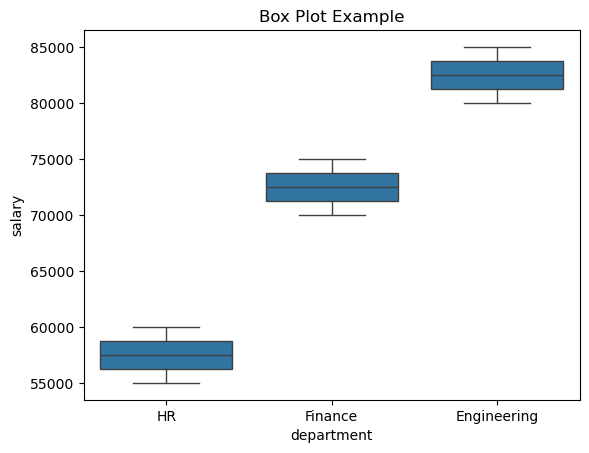

In [32]:
df = pd.DataFrame({
    'department': ['HR', 'Finance', 'HR', 'Engineering', 'Finance', 'Engineering'],  # Departments
    'salary': [60000, 70000, 55000, 80000, 75000, 85000]  # Corresponding salaries
})

sns.boxplot(x = 'department', y = 'salary', data = df)
plt.title('Box Plot Example')
plt.show()